In [1]:
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = Path('/data/ronan/cifar-10-batches-py')
train_files = [f'data_batch_{i}' for i in range(1,6)]
test_file = 'test_batch'

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
dat = unpickle(data_dir / train_files[0])

In [5]:
X = dat[b'data']
y = dat[b'labels']

In [6]:
X.shape

(10000, 3072)

In [7]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1005,  974, 1032, 1016,  999,  937, 1030, 1001, 1025,  981]))

In [8]:
def load_cifar10(batches = [1,2,3,4,5]):
    data_dir = Path('/data/ronan/cifar-10-batches-py')
    
    y_train = []
    X_train = []
    for i,batch in enumerate(batches):
        dict = _unpickle(data_dir / f'data_batch_{batch}')
        X_train.append(dict[b'data'])
        y_train.append(dict[b'labels'])
        
    test_dict = _unpickle(data_dir / f'test_batch')
    X_test = np.asarray(dict[b'data'])
    y_test = np.asarray(dict[b'labels'])

    return (
        np.concatenate(X_train, axis=0),
        np.concatenate(y_train, axis=0),
        X_test,
        y_test,
        {'height':32*3, 'width':32}
    )

def _unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
    

In [10]:
X_train, y_train, X_test, y_test, _ = load_cifar10()

In [11]:
X.shape

(50000, 3072)

In [26]:
X = np.ones((2,2))
X_3d = np.stack((X,X*2,X*3))
X = X.flatten()
X_1d = np.hstack((X,X*2,X*3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

## Gabor filter

In [13]:
dim = 6
(y, x) = np.meshgrid(np.arange(-dim,dim+1), np.arange(-dim,dim+1))

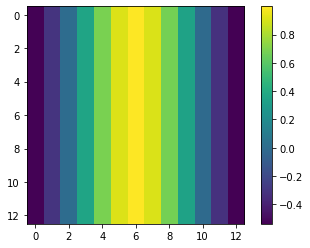

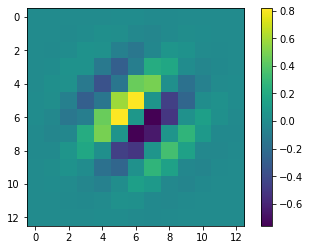

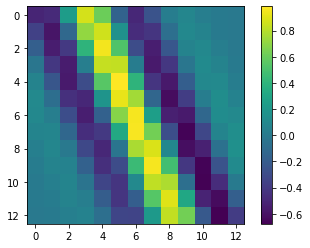

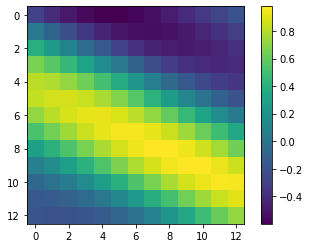

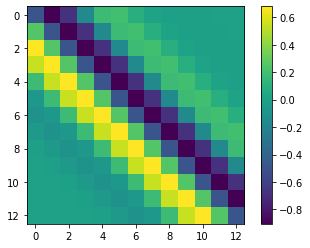

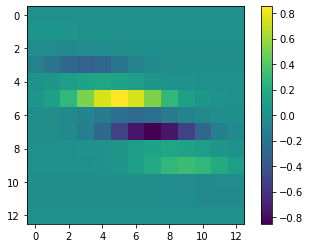

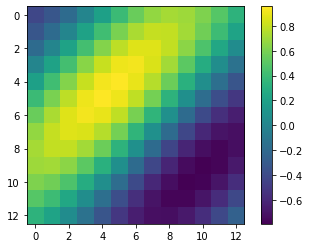

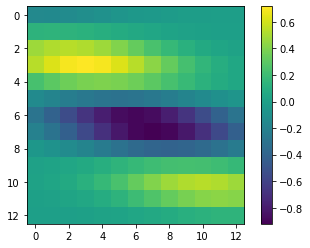

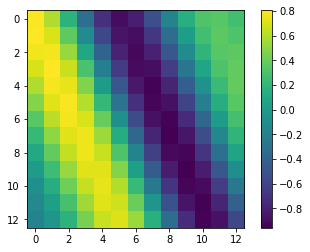

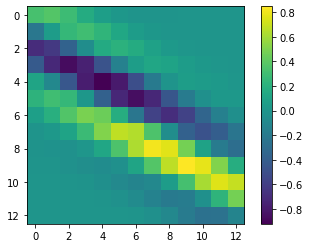

In [14]:
for _ in range(10):
    n = np.random.choice(np.arange(5))
    m = np.random.choice(np.arange(8))

    psi = np.random.uniform()*math.pi
    omega = math.pi / 2 * math.sqrt(2)**(-n)
    theta = math.pi / 8 * m
    sigma = math.pi / omega
    
    costheta = math.cos(theta)
    sintheta = math.sin(theta)
    
    xprime = (x) * costheta + (y) * sintheta
    yprime = -(x) * costheta + (y) * costheta
    
    gb = np.exp(-(xprime**2 + yprime**2) / 2 / sigma**2) * np.cos(omega * xprime + psi)
    
    f,ax = plt.subplots(1,1)
    plt.imshow(gb)
    plt.colorbar()